In [1]:
# Convert COCO JSON to YOLO text files using PyLabel functions

import logging
logging.getLogger().setLevel(logging.CRITICAL)
from pylabel import importer

#import os 
import pandas as pd
#import json
#import shutil
from tqdm import tqdm


In [2]:
#Specify path to the coco.json file
path_to_annotations = '/Users/caraappel/Documents/CV4E/oregon_critters/coco_json/ground.json'

#Specify location of images
path_to_images = '/Volumes/Cara_cam_traps/CV4E/data_cleaned/ground/'

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images)
dataset.df.head(5)

,img_folder,img_filename,img_path,img_id,img_width,img_height,img_depth,ann_segmented,ann_bbox_xmin,ann_bbox_ymin,...,ann_iscrowd,ann_keypoints,ann_pose,ann_truncated,ann_difficult,cat_id,cat_name,cat_supercategory,split,annotated
id,,,,,,,,,,,,,,,,,,,,,
0,/Volumes/Cara_cam_traps/CV4E/data_cleaned/ground/,data/COA_2020/hailey.hester-COA_2020_Cougar_HH...,,1,2048,1536,,,1273.130996,709.285723,...,0,,,,,25,Cougar,object,,1
1,/Volumes/Cara_cam_traps/CV4E/data_cleaned/ground/,data/COA_2020/hailey.hester-COA_2020_Cougar_HH...,,2,2048,1536,,,1151.768044,345.376653,...,0,,,,,25,Cougar,object,,1
2,/Volumes/Cara_cam_traps/CV4E/data_cleaned/ground/,data/COA_2020/hailey.hester-COA_2020_Cougar_HH...,,3,2048,1536,,,180.864428,108.835758,...,0,,,,,25,Cougar,object,,1
3,/Volumes/Cara_cam_traps/CV4E/data_cleaned/ground/,data/COA_2020/hailey.hester-COA_2020_Cougar_HH...,,4,2048,1536,,,4.888148,101.085837,...,0,,,,,25,Cougar,object,,1
4,/Volumes/Cara_cam_traps/CV4E/data_cleaned/ground/,data/COA_2020/hailey.hester-COA_2020_Cougar_HH...,,5,2048,1536,,,4.888148,900.337985,...,0,,,,,25,Cougar,object,,1


In [3]:
# Analyze annotations
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")


Number of images: 30418
Number of classes: 39
Classes:['CanadaJay', 'Coyote', 'PileatedWoodpecker', 'Mink', 'AmericanRobin', 'DouglasSquirrel', 'FlyingSquirrel', 'Grouse', 'Invertebrate', 'MountainBeaver', 'OtherBird', 'SmallMammal', 'Warbler', 'Chickadee', 'MountainQuail', 'StripedSkunk', 'Human', 'BlackBear', 'BlackTailedDeer', 'Bobcat', 'Cougar', 'DarkEyedJunco', 'GraySquirrel', 'Herp', 'NorthernFlicker', 'Opossum', 'Rabbit', 'Racoon', 'RooseveltElk', 'SpottedSkunk', 'StellersJay', 'Thrush', 'TownsendsChipmunk', 'VariedThrush', 'Weasel', 'Woodpecker', 'Woodrat', 'Wren', 'GroundSquirrel']
Class counts:
cat_name
Thrush                6459
TownsendsChipmunk     4909
SmallMammal           3664
DouglasSquirrel       3469
FlyingSquirrel        2981
VariedThrush          2890
Rabbit                1161
DarkEyedJunco          627
BlackBear              462
AmericanRobin          440
MountainBeaver         350
BlackTailedDeer        345
Herp                   305
StellersJay            300
W

In [4]:
# Explore the 'data' attribute using dir() and vars()
data_attribute = dataset.analyze
print(dir(data_attribute))

print(dataset.analyze.class_counts)
print(dataset.analyze.class_ids)
print(dataset.analyze.class_name_id_map)

['ShowClassSplits', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'class_counts', 'class_ids', 'class_name_id_map', 'classes', 'dataset', 'num_classes', 'num_images']
cat_name
Thrush                6459
TownsendsChipmunk     4909
SmallMammal           3664
DouglasSquirrel       3469
FlyingSquirrel        2981
VariedThrush          2890
Rabbit                1161
DarkEyedJunco          627
BlackBear              462
AmericanRobin          440
MountainBeaver         350
BlackTailedDeer        345
Herp                   305
StellersJay            300
Woodrat                297
Woodpecker             275
Bobcat                 266
SpottedSkunk           255
Invertebrate           184
Wren         

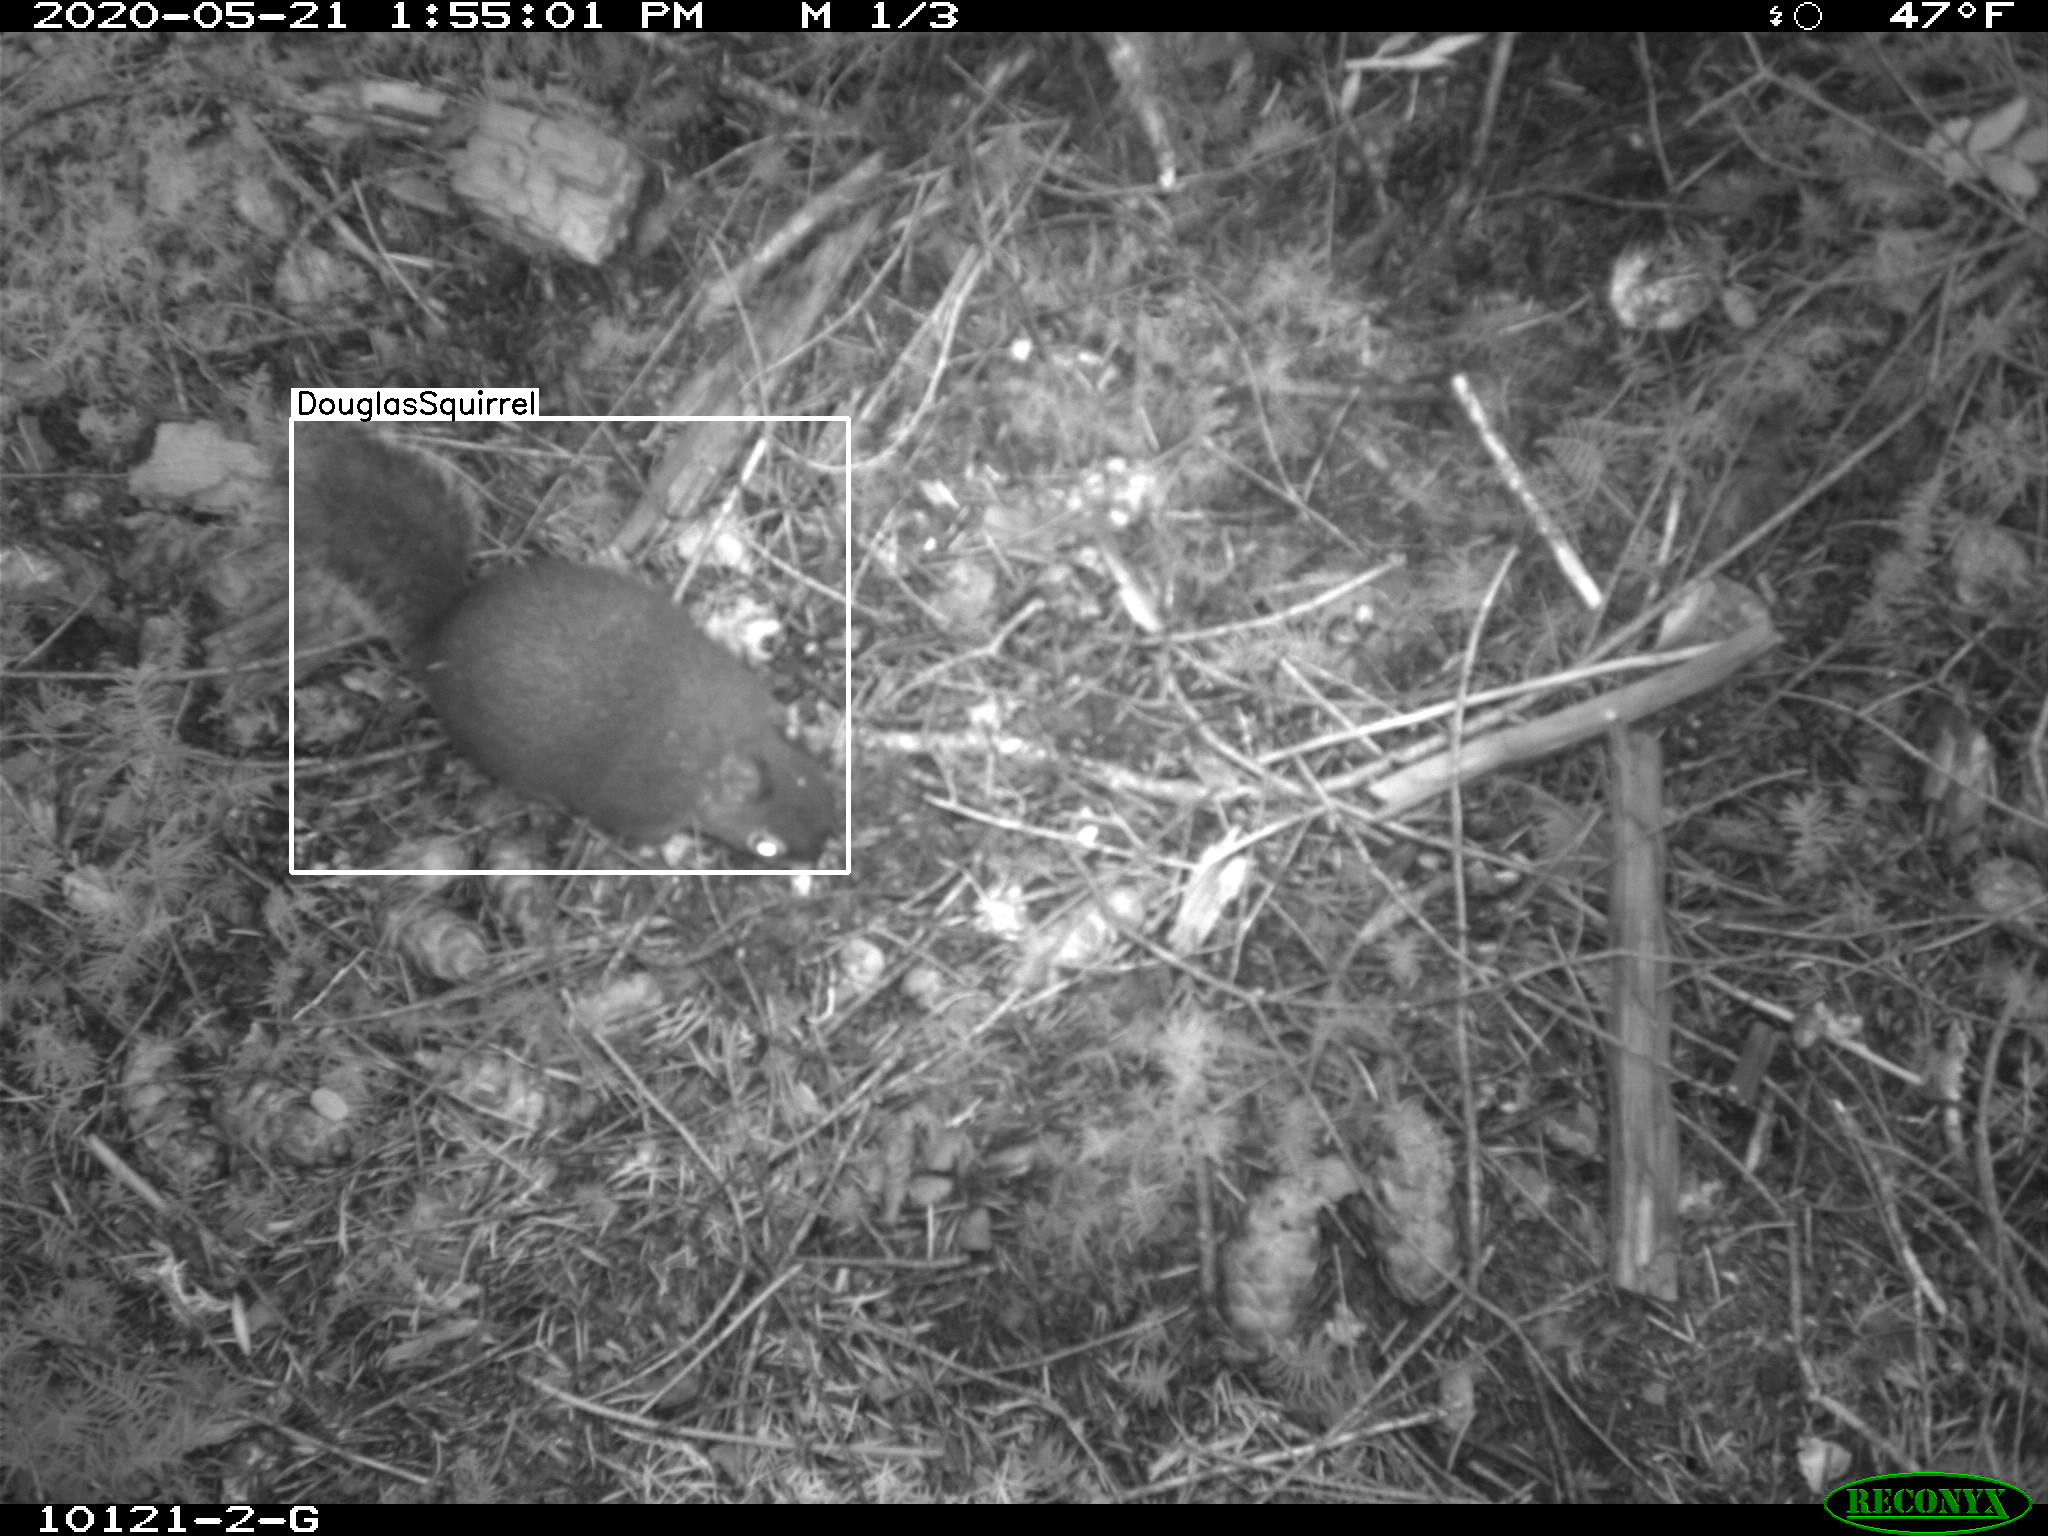

In [5]:
# Visualize annotations

from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(738))
#display(dataset.visualize.ShowBoundingBoxes("image.jpg"))

In [6]:
# Export to YOLOv5 format (creates .txt file for each image)
dataset.path_to_annotations = ""

dataset.export.ExportToYoloV5(output_path = path_to_images,
                              copy_images = False,
                              cat_id_index = 0)[0]

Exporting YOLO files...: 100%|██████████| 30418/30418 [02:17<00:00, 220.66it/s]


'/Volumes/Cara_cam_traps/CV4E/data_cleaned/dataset.yaml'

In [ ]:
# .yaml file is created in the same base location as the image/output path. rename it!
# also need to add numbers to the class list

# YOLO .txt files were put into /images folders so we need to create /labels folders and move them there
# Use 8_move_yolo_files.py to do that 